In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
def sigmoid(x, kappa=1.0):
    return 1.0 / (1.0 + np.exp(-x * kappa))

def cosine(x, kappa=1.0):
    return 

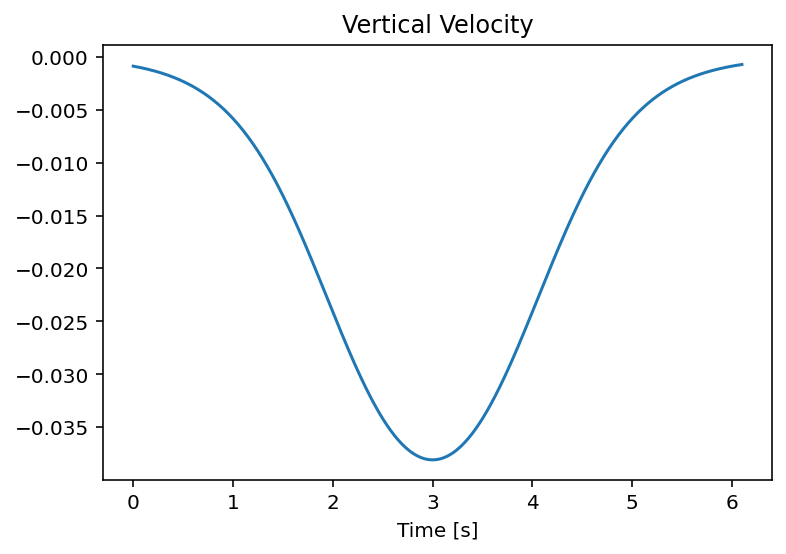

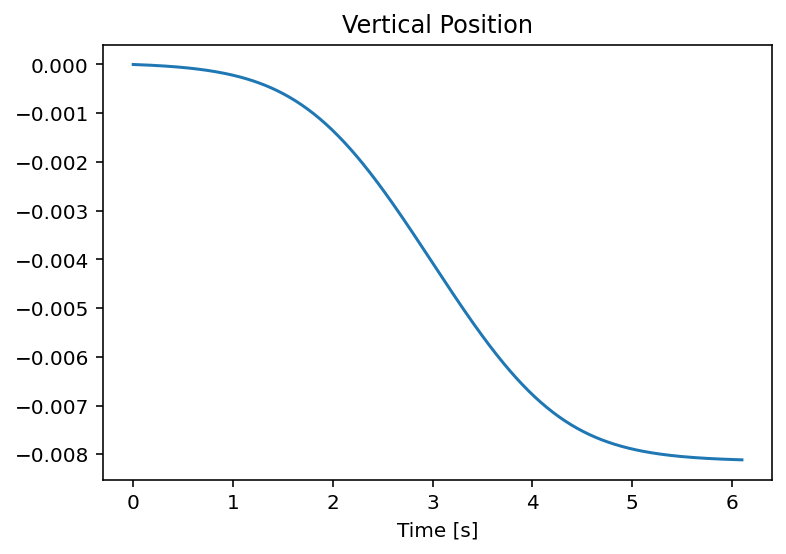

In [4]:
time_max = 6.1
xs = np.linspace(0.0, time_max, 500)
kappa = 2.0
v_z = -0.05
dt = 0.001

vs = v_z * (sigmoid(xs - 2.0, kappa) + sigmoid(-xs + 4.0, kappa) - 1.0)
plt.plot(xs, vs)
plt.title("Vertical Velocity")
plt.xlabel("Time [s]")
plt.show()

ps = np.cumsum(vs * dt)
plt.title("Vertical Position")
plt.xlabel("Time [s]")
plt.plot(xs, ps);

In [5]:
def sigmoid_step(x, kappa=1.0):
    if x <= 0.0:
        return 0.0
    if x >= 1.0 / kappa:
        return 1.0
    return np.sin((x*np.pi*kappa-np.pi/2)) * 0.5 + 0.5

In [29]:
sigmoid_step(1.0)

1.0

In [30]:
sigmoid_step(2.0)

1.0

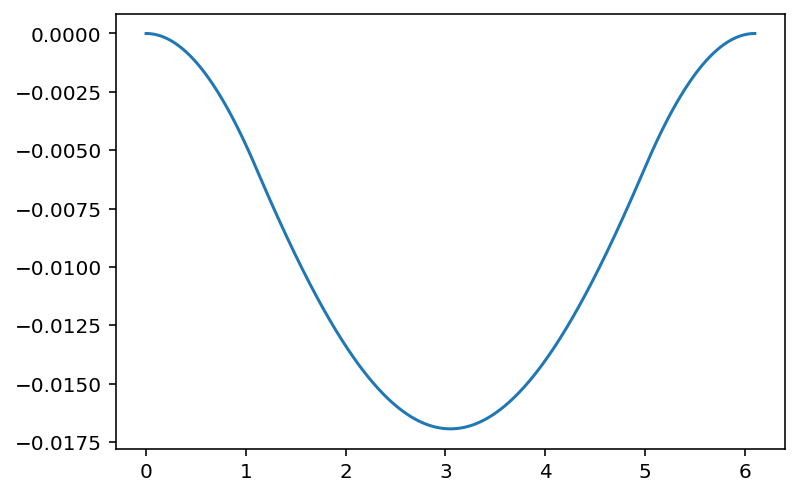

In [6]:
v_z = -0.05
trajectory = np.array([v_z * (sigmoid_step(x, 0.2) + sigmoid_step(time_max-x, 0.2) - 1.0) for x in xs])
plt.plot(xs, trajectory)

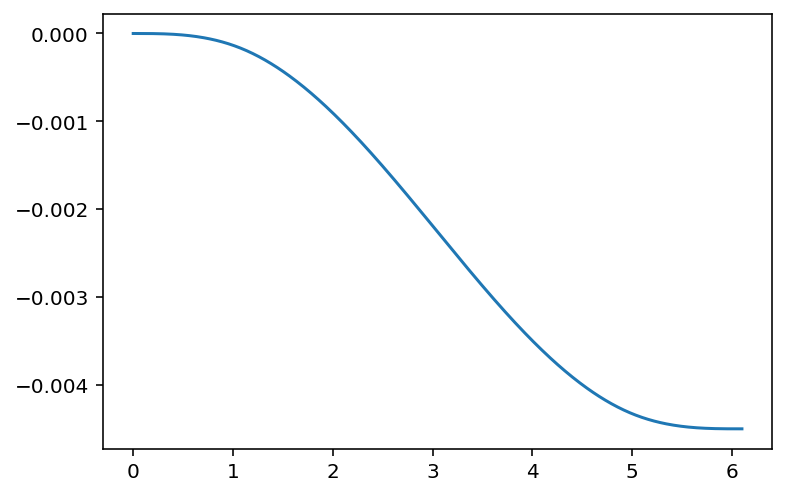

In [7]:
plt.plot(xs, np.cumsum(trajectory * dt))

In [23]:
def franka_step(time):
    cycle = math.floor(math.pow(-1.0, (time - math.fmod(time, 6.0)) / 6.0))
    v = cycle * 0.05 / 2.0 * (1.0 - np.cos(2.0 * np.pi / 6.0 * time))
    angle = np.pi / 4.0
    v_z = -np.sin(angle) * v
    return v_z

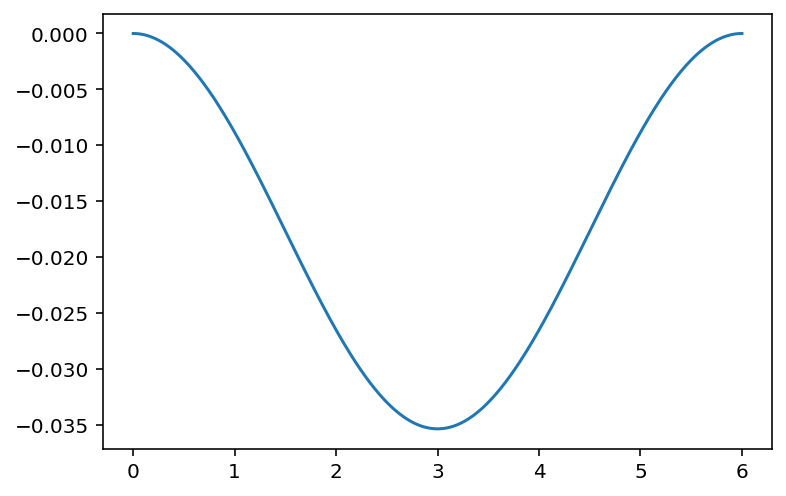

In [24]:
plt.plot(xs, [franka_step(x) for x in xs])

In [64]:
log = json.load(open(f"build/log_panda_cut_vertical.json", "r"))

In [41]:
log.keys()

dict_keys(['EE_T_K', 'EE_position', 'F_T_EE', 'F_T_NE', 'F_x_Cload', 'F_x_Ctotal', 'I_ee', 'I_load', 'I_total', 'K_F_ext_hat_K', 'O_F_ext_hat_K', 'O_T_EE', 'coriolis', 'datetime', 'force', 'gravity', 'jacobian', 'q', 'qd', 'robot_time', 'tau', 'tau_ext_hat_filtered', 'time', 'wrench'])

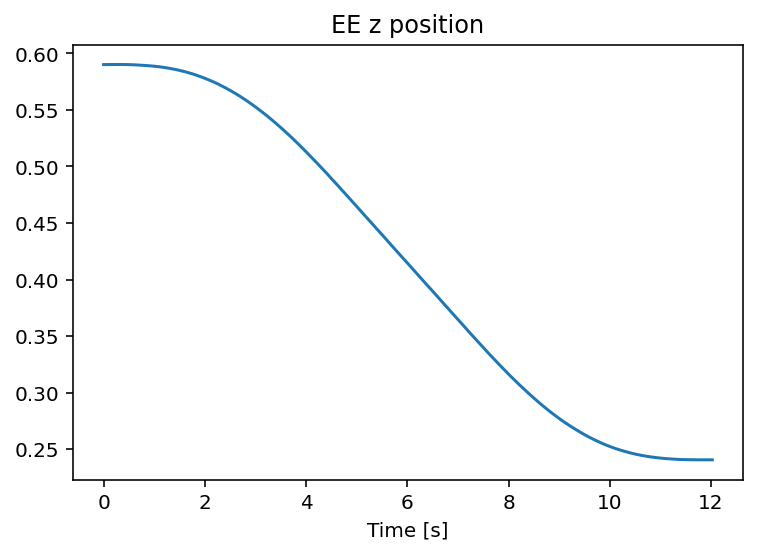

In [60]:
plt.plot(log["time"], [tf[14] for tf in log["O_T_EE"]])
plt.title("EE z position")
plt.xlabel("Time [s]");

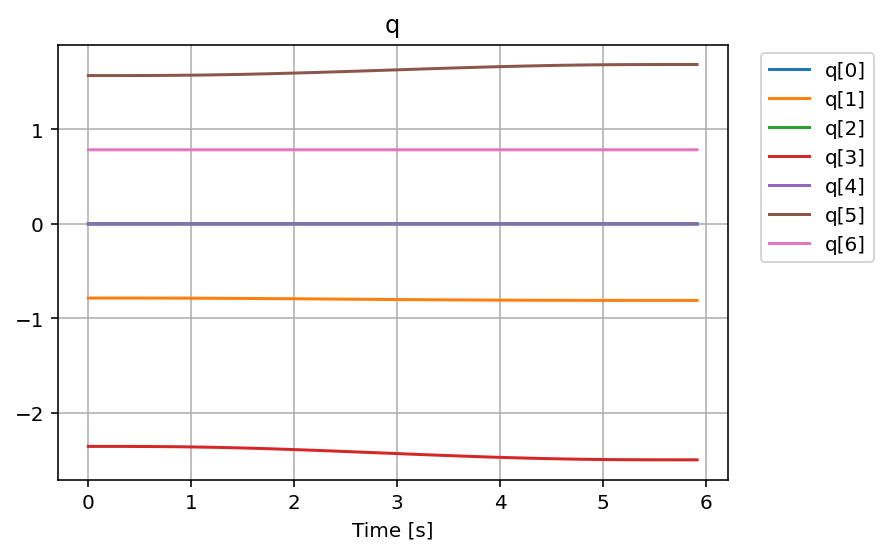

In [57]:
for i in range(len(log["q"][0])):
    plt.plot(log["time"], [q[i] for q in log["q"]], label="q[%i]" % i)
plt.title("q")
plt.legend(loc=(1.05, 0.5))
plt.grid()
plt.xlabel("Time [s]");

In [65]:
log["q"][-1]

[0.000834242574274213,
 0.2900282463107192,
 0.0005799547732569646,
 -2.937202012078804,
 0.0035845843508754173,
 3.226281019502349,
 0.7825557258720371]

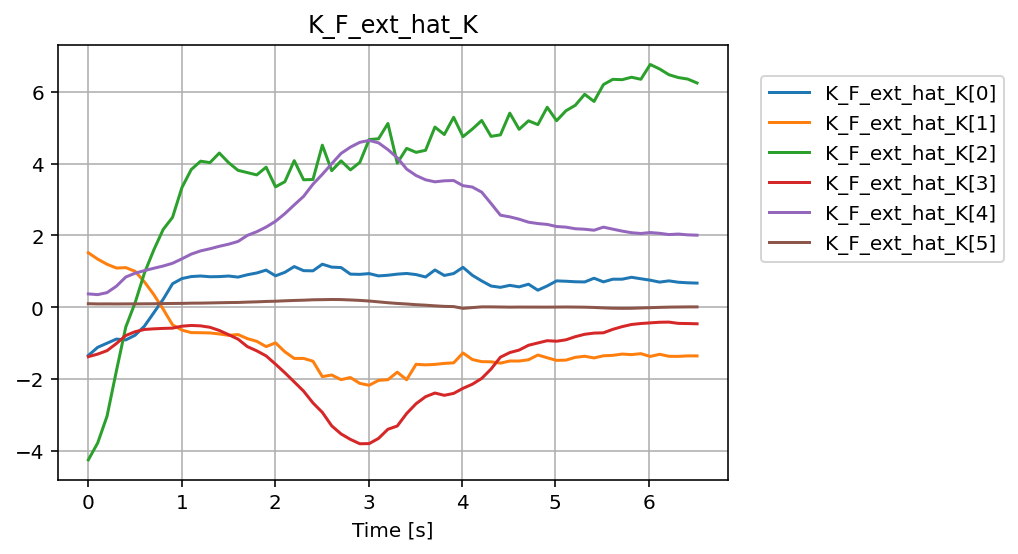

In [66]:
for i in range(len(log["K_F_ext_hat_K"][0])):
    plt.plot(log["time"], [q[i] for q in log["K_F_ext_hat_K"]], label="K_F_ext_hat_K[%i]" % i)
plt.title("K_F_ext_hat_K")
plt.legend(loc=(1.05, 0.5))
plt.grid()
plt.xlabel("Time [s]");

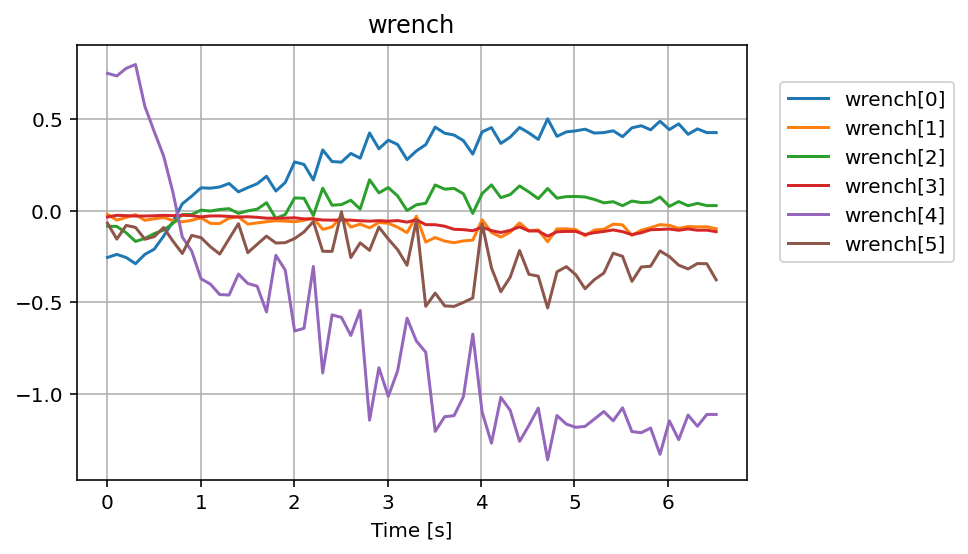

In [67]:
for i in range(len(log["wrench"][0])):
    plt.plot(log["time"], [q[i] for q in log["wrench"]], label="wrench[%i]" % i)
plt.title("wrench")
plt.legend(loc=(1.05, 0.5))
plt.grid()
plt.xlabel("Time [s]");